<h1> MTH4000 Programming in Python I</h1>
<h2> Week 5 Lab Workbook (Solutions)</h2>
<h3><em> Dr Matthew Lewis and Prof. Thomas Prellberg </em></h3>

<h2> Exercise 1: <em>Logical Operators</em> </h2>

In the lecture notes, we saw logical operators that acted on pairs of boolean values to produce other booleans.  One such operator was <code><span style="color:rgb(0,128,0);font-weight:bold;">and</span></code>.

Since there are only two distinct boolean values (<code><span style="color:rgb(0,128,0);font-weight:bold;">True</span></code> and <code><span style="color:rgb(0,128,0);font-weight:bold;">False</span></code>), and there are two arguments in each call using the <code><span style="color:rgb(0,128,0);font-weight:bold;">and</span></code> operator, there will be $2\times 2=4$ combinations that define the effect of this operator. Compute and print the truth value of these four combinations.

In [1]:
print(True and True)
print(True and False)
print(False and True)
print(False and False)

True
False
False
False


We can collate this data into a truth table.  This effectively gives a definition of the <code><span style="color:rgb(0,128,0);font-weight:bold;">and</span></code> operator.

| A | B | B and A |
|---|---|---|
| True | True | True |
| True | False | False |
| False | True | False |
| False | False | False |

The implies operator (sometimes denoted with the symbol <samp>⇒</samp> ) is not implemented in a standard Python environment.  It can be defined with the following truth table:

| A | B | A ⇒ B |
|---|---|---|
| True | True | True |
| True | False | False |
| False | True | True |
| False | False | True |

Using built-in logical operators, verify that for any boolean values <samp>A</samp> and <samp>B</samp>, the statement <samp>A&nbsp;⇒&nbsp;B</samp> is equivalent to the statement <samp>B&nbsp;or&nbsp;not&nbsp;A</samp>.

In [2]:
print(True or not True)
print(False or not True)
print(True or not False)
print(False or not False)

True
False
True
True


Use these operations to construct our own function <code>implies</code> that will accept any two boolean values, <code>A</code> and <code>B</code>, and return the boolean value of the statement <samp><code>A</code>&nbsp;⇒&nbsp;<code>B</code></samp>.

In [3]:
def implies(A, B):
    """Return the boolean value of the statement 'A implies B'.

    Parameters: A, B (bools)

    Returns: out (bool)"""
    out = B or not A
    return out

Test this function by calling it for all four combinations of boolean values that can be returned to <code>A</code> and <code>B</code>.

In [4]:
print(implies(True, True))
print(implies(True, False))
print(implies(False, True))
print(implies(False, False))

True
False
True
True


Now write a function <code>not_implies</code> that, for any booleans <code>A</code> and <code>B</code>, returns the negation of the call <code>implies(A, B)</code>.

In [5]:
def not_implies(A, B):
    """Return the boolean value of the statement 'not (A implies B').

    Parameters: A, B (bools)

    Returns: out (bool)"""
    out = not implies(A, B)
    return out

Test this function with all four combinations of inputs.

In [6]:
print(not_implies(True, True))
print(not_implies(True, False))
print(not_implies(False, True))
print(not_implies(False, False))

False
True
False
False


We now wish to test out these function by applying them to mathematical results (results that use implications).

For integers $a, m\in\mathbb{Z}$, we say that $a$ divides $m$ (and write $a|m$) if there exists some $k\in\mathbb{Z}$ such that $m=ka$.

Write a function <code>divides</code> which accepts two integers, <code>a</code> and <code>m</code>, and returns a boolean corresponding to the truth value of the statement '<code>a</code> divides <code>m</code>'.

In [7]:
def divides(a, m):
    """Return the boolean value of the statement 'a divides m'.

    Parameters: a, m (ints)

    Returns: out (bool)"""
    out = m%a==0
    return out

Test that this function works by evaluating it for one combinations of integers that results in <code><span style="color:rgb(0,128,0);font-weight:bold;">True</span></code> being returned, and one combination that gives <code><span style="color:rgb(0,128,0);font-weight:bold;">False</span></code>.

In [8]:
print(divides(1, 2))
print(divides(3, 2))

True
False


Observe the following result:

<blockquote><b>Theorem:</b> Let $a, b, m, n\in\mathbb{Z}$.

If $\,a|m\,$ and $\,b|n\,$, then $\,ab|mn\,$.</blockquote>

According to this result, the statement

<blockquote>If <samp>7</samp> divides <samp>14</samp> and <samp>2</samp> divides <samp>4</samp>, then <samp>14</samp> divides <samp>56</samp>.</blockquote>

is true, as is the statement

<blockquote>If <samp>7</samp> divides <samp>14</samp> and <samp>2</samp> divides <samp>3</samp>, then <samp>14</samp> divides <samp>42</samp>.</blockquote>

Using the <code>implies</code> and <code>divides</code> functions defined above, write a function <code>test_theorem</code> that accepts four integers, <code>a</code>, <code>b</code>, <code>m</code> and <code>n</code>, and returns the boolean value of the statement given in the above theorem.

In [9]:
def test_theorem(a, b, m, n):
    """Accept values a, b, m, n, and return the boolean value
    of the statement 'If a divides m, and b divides n, then
    ab divides mn.'.

    Parameters: a, b, m, n (ints)

    Returns: out (bool)"""
    out = implies(divides(a, m) and divides(b, n), divides(a*b, m*n))
    return out

Test this function by calling it for a few well-chosen examples.

In [10]:
print(test_theorem(2, 3, 4, 6)) # ( (True and True) implies True) is True
print(test_theorem(2, 6, 8, 3)) # ( (True and False) implies True) is True
print(test_theorem(2, 15, 3, 10)) # ( (False and False) implies True) is True
print(test_theorem(2, 3, 7, 4)) # ( (False and False) implies False) is True

True
True
True
True


Now consider the following claim, which is different from the result shown above:

<blockquote><b>Claim:</b> Let $a, b, n\in\mathbb{Z}$.

If $\,a|n\,$ and $\,b|n\,$, then $\,ab|n\,$.</blockquote>

Write a function <code>test_claim</code> that accepts three integers, <code>a</code>, <code>b</code> and <code>n</code>, and returns the boolean value of the statement given in the above claim.

In [11]:
def test_claim(a, b, n):
    """Accept values a, b, n, and return the boolean value
    of the statement 'If a divides m, and b divides n, then
    ab divides n.'.

    Parameters: a, b, n (ints)

    Returns: out (bool)"""
    out = implies(divides(a, n) and divides(b, n), divides(a*b,n))
    return out

Find at least one combination of integers <code>a</code>, <code>b</code> and <code>n</code> such that the function <code>test_claim</code> returns a boolean value of <code><span style="color:rgb(0,128,0);font-weight:bold;">False</span></code>.

In [12]:
print(test_claim(3, 3, 12))

False


Since this function returns the truth value of the above claim (for the called values of $a$, $b$ and $n$), this <code><span style="color:rgb(0,128,0);font-weight:bold;">False</span></code> output disproves the statement.

<h2> Exercise 2: <em>Roots of Cubics</em> </h2>

The discriminant of the cubic polynomial given by $\,p(x)=ax^3+bx^2+cx+d\,$ is

$$\Delta=b^2c^2-4ac^3-4b^3d-27a^2d^2+18abcd\;.$$

The discriminant gives us information about the roots of $p$:
<ul>
    <li>if $\Delta>0$, then $p$ has 3 distinct real roots;</li>
    <li>if $\Delta<0$, then $p$ has 2 distinct complex roots and 1 real root;</li>
    <li>if $\Delta=0$, then $p$ has 3 real roots, at least 2 of which are the same.</li>
</ul>

Any cubic polynomial $\,p(x)=ax^3+bx^2+cx+d\,$ can be represented by its coefficients $a, b, c, d$.  For example, the polynomial $p(x)=x^3-x+1$ can be represented by the values $1, 0, -1, 1$.

Write a function <code>has_three_real_roots</code> that accepts four floats <code>a</code>, <code>b</code>, <code>c</code> and <code>d</code> that are representative of the coefficients of a cubic polynomial, and returns a value of <code><span style="color:rgb(0,128,0);font-weight:bold;">True</span></code> if the corresponding cubic has 3 distinct real roots, and <code><span style="color:rgb(0,128,0);font-weight:bold;">False</span></code> otherwise.

In [13]:
def has_three_real_roots(a, b, c, d):
    """Return the boolean value of the statement
    'ax^3 + bx^2 + cx + d = 0 has three distinct real roots.'
    
    Parameters: a, b, c, d (floats)
    
    Returns: out (bool)
    """
    discriminant = (b**2)*(c**2)-4*a*(c**3)-4*(b**3)*d-27*(a**2)*(d**2)+18*a*b*c*d
    out = discriminant>0
    return out

Test this function on the polynomials

<ol>
    <li>$\: x^3$</li>
    <li>$\: x(1-x)^2$</li>
    <li>$\: x^3-x+1$</li>
    <li>$\: x^3-x$</li>
</ol>

In [14]:
print(has_three_real_roots(1, 0, 0, 0))
print(has_three_real_roots(1, -2, 1, 0))
print(has_three_real_roots(1, 0, -1, 1))
print(has_three_real_roots(1, 0, -1, 0))

False
False
False
True


<h2> Exercise 3: <em>Moon-te Carlo Methods</em> </h2>

A Monte Carlo method is an algorithm that approximates the area of a region by taking a large sample of uniformly distributed points over an area that covers that region, and evaluating the proportion of points that fall inside it.

For instance, consider the region bounded by the following condition:

$$x^2+y^2\leq 1\: .$$

This region is shown shaded in white in the plot below.

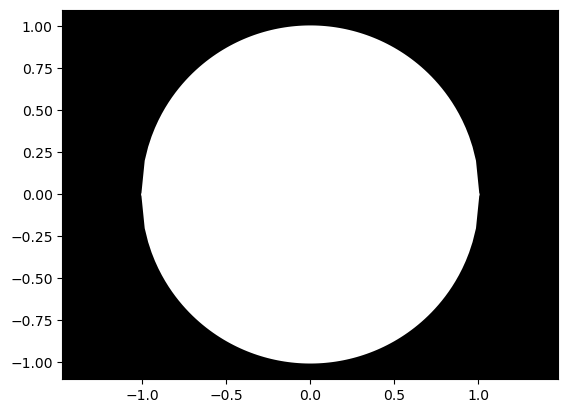

In [15]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-1, 1, 100)
y1 = (1-x**2)**0.5
y2 = -(1-x**2)**0.5

plt.plot(x, y1, color = 'white')
plt.plot(x, y2, color = 'white')
ax = plt.gca()
ax.axis('equal')
ax.set_facecolor('black')
ax.fill_between(x, y1, y2, facecolor = 'white')
plt.show()

It should be clear that this boundary is a circle of radius $1$, and so a Monte Carlo method should return a value approximately equal to $\pi$.

The region is covered by the set $[-1,1]\times[-1,1]$, which is a square of area $4$.  

Therefore, if we take a large number of uniformly distributed points over the square $[-1,1]\times[-1,1]$, the proportion of the points that lie inside the region should be approximately equal to a quarter of the region's area.

In [16]:
from random import uniform

# Create a list of 10000 points (x,y) that are uniformly distributed
# in the square [-1,1]*[-1,1]
points = [(uniform(-1,1),uniform(-1,1)) for i in range(10000)]

Define a function <code>inside_circle</code> that accepts a tuple <code>x</code> corresponding to the coordinates of a point in the set $[-1,1]\times[-1,1]$, and returns <samp>1</samp> if the point <code>x</code> lies inside the circle $x^2+y^2=1\,$, and <samp>0</samp> otherwise.

In [17]:
def inside_circle(x):
    """Return an integer corresponding to the truth value of the statement
    'The point given by x lies inside the circle x^2+y^2=1.'.

    Parameters: x (tuple)

    Returns: out (int)"""
    if x[0]**2+x[1]**2<=1:
        out = 1
    else:
        out = 0
    return out

Use this function to find the proportion of points inside the list <code>points</code> that lie inside the circle $x^2+y^2=1$, then use this proportion to find an estimate for $\pi$.

In [18]:
4*sum([inside_circle(i) for i in points])/len(points)

3.1364

Now consider the region bounded by the conditions:

$$\begin{align*}
x^2+y^2 &\leq 9\\
\text{and}\qquad 3x^2+y^2 &\geq 9
\end{align*}$$

This region is shown shaded in white in the plot below.

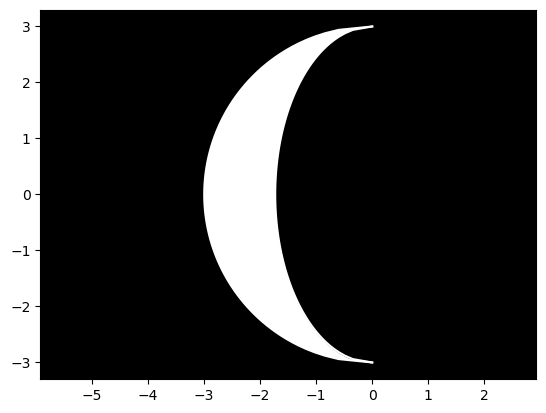

In [19]:
y=np.linspace(-3,3,100)
x1=-(9-y**2)**0.5
x2=-(1/3**0.5)*(9-y**2)**0.5

plt.plot(x1,y,color='white')
plt.plot(x2,y,color='white')
ax=plt.gca()
ax.axis('equal')
ax.set_facecolor('black')
ax.fill_between(x1,y,facecolor='white')
ax.fill_between(x2,y,facecolor='black',edgecolor='black')
plt.show()

In the box below, define a new list <code>points</code> containing <samp>10000</samp> uniformly distributed points that cover the rectangle $[-3,0]\times[-3,3]$.

Also, define a function <code>inside_crescent</code> that accepts a point <code>x</code> in this rectangle, and returns a value of <samp>1</samp> if <code>x</code> lies inside the crescent, and $0$ otherwise.

In [20]:
points=[(uniform(-3,0),uniform(-3,3)) for i in range(10000)]

def inside_crescent(x):
    """Return an integer corresponding to the truth value of the statement
    'The point given by x lies inside the crescent bounded by the regions
    x^2+y^2<=9 and 3x^2+y^2>=9.'.

    Parameters: x (tuple)

    Returns: out (int)"""
    if x[0]**2+x[1]**2<=9 and 3*x[0]**2+x[1]**2>=9:
        out = 1
    else:
        out = 0
    return out

Once you have done this, apply `inside_crescent` to the list `points` to find an approximation of the area enclosed by the crescent.

In [21]:
18*sum([inside_crescent(i) for i in points])/len(points)

5.994

Note that for any ellipse given by

$$\left(\frac{x}{a}\right)^2+\left(\frac{y}{b}\right)^2=1\:,$$

the enclosed area is equal to $\pi a b$.

We can therefore evaluate the exact area of the above crescent to be

$$\frac{3\pi}{2}\left(3-\sqrt{3}\right)\;.$$

Compute this value in the box below to determine whether it closely matches the value you computed above.

In [22]:
3*np.pi/2*(3-3**0.5)

5.97506980210009

<h2> Feedback </h2>

Attempt all of these questions during Week 5. This worksheet will be discussed in detail on a Lab Walkthrough video to be posted to QMplus at the end of the week.

If you have any problems or questions, or simply you would like some feedback, then you can:

<ul>
    <li> Ask the tutors present in your IT Lab sessions.</li><br>
    <li> Ask the Student Forum on the module's QM Plus page.</li><br>
    <li> Email the lecturers for assistance.</li>
</ul>